In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from graspy.inference import SemiparametricTest
from graspy.embed import AdjacencySpectralEmbed
import seaborn as sns
import warnings
from graspy.simulations import binary_sbm#, rdpg
from graspy.utils import symmetrize
from tqdm import tqdm_notebook as tqdm

warnings.filterwarnings("ignore")
FONTSIZE = 30

In [2]:
def double_plot(A, B):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    sns.heatmap(A, ax=ax[0], xticklabels=False, yticklabels=False, cbar=False, cmap='Blues')
    sns.heatmap(B, ax=ax[1], xticklabels=False, yticklabels=False, cbar=False, cmap='Blues')
    ax[0].set_title('Adjacency matrix A', fontsize=FONTSIZE)
    ax[1].set_title('Adjacency matrix B',fontsize=FONTSIZE)
    return ax

In [4]:
def rho_sbm(rho,k,L,n=100):
    L = symmetrize(L)
    A = binary_sbm([int(n/k)]*k, L)
    BL = np.repeat(np.repeat(L,n//k,0),n//k,1)
    B = np.random.binomial(1,(1-rho)*BL + rho*A)
    B = symmetrize(B)
    #np.fill_diagonal(B,0)
    return A,B

In [21]:
n = 100
k = 4
L = np.array([
    [0.9, 0.11, 0.13, 0.2],
    [0, 0.7, 0.1, 0.1], 
    [0, 0, 0.8, 0.1],
    [0, 0, 0, 0.85]
])
L = symmetrize(L)

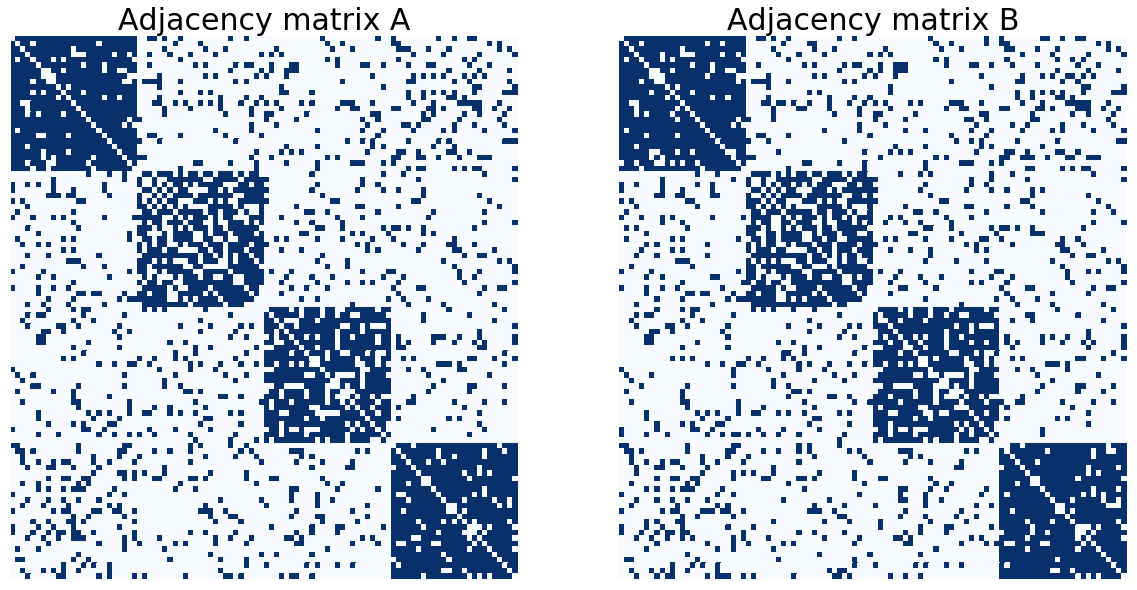

(2, 10000)
0.9414826268745963
15.588457268119896


In [5]:
A,B = rho_sbm(.9,k,L,n)
double_plot(A,B)
plt.show()
x = np.vstack((A.ravel(),B.ravel()))
print(x.shape)
print(np.corrcoef(x)[0,1])
print(np.linalg.norm(A-B))

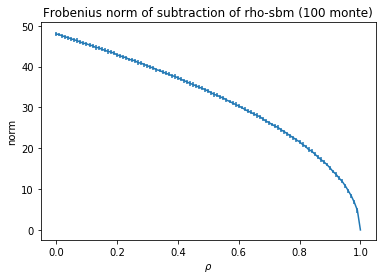

In [6]:
y = []
yerr = []
for rho in tqdm(np.linspace(0,1,101)):
    diffs = []
    for _ in range(0,100):
        A,B = rho_sbm(rho,k,L,n)
        diffs.append(np.linalg.norm(A-B))
    y.append(np.mean(diffs))
    yerr.append(np.std(diffs))
plt.errorbar(np.linspace(0,1,101),y,yerr=yerr)
plt.title('Frobenius norm of subtraction of rho-sbm (100 monte)')
plt.xlabel(r"$\rho$")
plt.ylabel('norm')
plt.show()

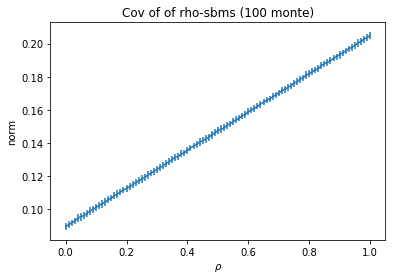

In [7]:
y = []
yerr = []
for rho in tqdm(np.linspace(0,1,101)):
    diffs = []
    for _ in range(0,100):
        A,B = rho_sbm(rho,k,L,n)
        A = A.ravel()
        B = B.ravel()
        diffs.append(np.cov(A.ravel(),B.ravel())[0,1])
    y.append(np.mean(diffs))
    yerr.append(np.std(diffs))
plt.errorbar(np.linspace(0,1,101),y,yerr=yerr)
plt.title('Cov of of rho-sbms (100 monte)')
plt.xlabel(r"$\rho$")
plt.ylabel('norm')
plt.show()

[[1.         0.39785619]
 [0.39785619 1.        ]]
[[1.         0.41155101]
 [0.41155101 1.        ]]
[[1.         0.43591643]
 [0.43591643 1.        ]]
[[1.         0.42730637]
 [0.42730637 1.        ]]
[[1.         0.43491578]
 [0.43491578 1.        ]]
[[1.         0.39833355]
 [0.39833355 1.        ]]
[[1.         0.42862289]
 [0.42862289 1.        ]]
[[1.         0.39995771]
 [0.39995771 1.        ]]
[[1.         0.41293329]
 [0.41293329 1.        ]]
[[1.         0.43656043]
 [0.43656043 1.        ]]
[[1.         0.42457289]
 [0.42457289 1.        ]]
[[1.        0.4373995]
 [0.4373995 1.       ]]
[[1.         0.44387134]
 [0.44387134 1.        ]]
[[1.         0.41064536]
 [0.41064536 1.        ]]
[[1.         0.42044822]
 [0.42044822 1.        ]]
[[1.         0.42628777]
 [0.42628777 1.        ]]
[[1.         0.41724569]
 [0.41724569 1.        ]]
[[1.         0.43187932]
 [0.43187932 1.        ]]
[[1.         0.42447558]
 [0.42447558 1.        ]]
[[1.         0.42508691]
 [0.425086

[[1.         0.40330524]
 [0.40330524 1.        ]]
[[1.         0.40930853]
 [0.40930853 1.        ]]
[[1.         0.41577092]
 [0.41577092 1.        ]]
[[1.        0.4402558]
 [0.4402558 1.       ]]
[[1.         0.44230427]
 [0.44230427 1.        ]]
[[1.         0.44657932]
 [0.44657932 1.        ]]
[[1.         0.41279432]
 [0.41279432 1.        ]]
[[1.         0.43082303]
 [0.43082303 1.        ]]
[[1.         0.43231026]
 [0.43231026 1.        ]]
[[1.        0.4014504]
 [0.4014504 1.       ]]
[[1.         0.40883142]
 [0.40883142 1.        ]]
[[1.         0.42927555]
 [0.42927555 1.        ]]
[[1.         0.43242264]
 [0.43242264 1.        ]]
[[1.         0.44126857]
 [0.44126857 1.        ]]
[[1.         0.47003805]
 [0.47003805 1.        ]]
[[1.         0.43262121]
 [0.43262121 1.        ]]
[[1.         0.42194241]
 [0.42194241 1.        ]]
[[1.         0.42547299]
 [0.42547299 1.        ]]
[[1.         0.42560101]
 [0.42560101 1.        ]]
[[1.         0.42027208]
 [0.42027208 1

[[1.        0.4492849]
 [0.4492849 1.       ]]
[[1.         0.43236545]
 [0.43236545 1.        ]]
[[1.         0.42415761]
 [0.42415761 1.        ]]
[[1.         0.40088907]
 [0.40088907 1.        ]]
[[1.         0.42738871]
 [0.42738871 1.        ]]
[[1.         0.44792924]
 [0.44792924 1.        ]]
[[1.        0.4493575]
 [0.4493575 1.       ]]
[[1.         0.43073035]
 [0.43073035 1.        ]]
[[1.         0.44111725]
 [0.44111725 1.        ]]
[[1.         0.42576159]
 [0.42576159 1.        ]]
[[1.         0.43818387]
 [0.43818387 1.        ]]
[[1.         0.43157628]
 [0.43157628 1.        ]]
[[1.         0.42079673]
 [0.42079673 1.        ]]
[[1.         0.44936086]
 [0.44936086 1.        ]]
[[1.        0.4424974]
 [0.4424974 1.       ]]
[[1.         0.44409665]
 [0.44409665 1.        ]]
[[1.         0.43018131]
 [0.43018131 1.        ]]
[[1.         0.41949142]
 [0.41949142 1.        ]]
[[1.         0.44296191]
 [0.44296191 1.        ]]
[[1.         0.44100058]
 [0.44100058 1.   

[[1.        0.4319661]
 [0.4319661 1.       ]]
[[1.         0.45186121]
 [0.45186121 1.        ]]
[[1.       0.456582]
 [0.456582 1.      ]]
[[1.         0.45703486]
 [0.45703486 1.        ]]
[[1.         0.44002233]
 [0.44002233 1.        ]]
[[1.         0.45045778]
 [0.45045778 1.        ]]
[[1.         0.44237257]
 [0.44237257 1.        ]]
[[1.         0.45301577]
 [0.45301577 1.        ]]
[[1.         0.45488052]
 [0.45488052 1.        ]]
[[1.         0.45535785]
 [0.45535785 1.        ]]
[[1.         0.46448098]
 [0.46448098 1.        ]]
[[1.         0.45776357]
 [0.45776357 1.        ]]
[[1.         0.44713047]
 [0.44713047 1.        ]]
[[1.         0.43934238]
 [0.43934238 1.        ]]
[[1.         0.44923321]
 [0.44923321 1.        ]]
[[1.         0.44884542]
 [0.44884542 1.        ]]
[[1.         0.45136019]
 [0.45136019 1.        ]]
[[1.         0.46810827]
 [0.46810827 1.        ]]
[[1.         0.45638475]
 [0.45638475 1.        ]]
[[1.         0.45414094]
 [0.45414094 1.   

[[1.         0.46769933]
 [0.46769933 1.        ]]
[[1.         0.42850671]
 [0.42850671 1.        ]]
[[1.         0.46743755]
 [0.46743755 1.        ]]
[[1.         0.47357687]
 [0.47357687 1.        ]]
[[1.         0.45423056]
 [0.45423056 1.        ]]
[[1.         0.46726854]
 [0.46726854 1.        ]]
[[1.         0.45005302]
 [0.45005302 1.        ]]
[[1.         0.43684992]
 [0.43684992 1.        ]]
[[1.         0.47057935]
 [0.47057935 1.        ]]
[[1.         0.47530665]
 [0.47530665 1.        ]]
[[1.         0.46796426]
 [0.46796426 1.        ]]
[[1.         0.45610428]
 [0.45610428 1.        ]]
[[1.         0.47135046]
 [0.47135046 1.        ]]
[[1.         0.46031706]
 [0.46031706 1.        ]]
[[1.         0.47626167]
 [0.47626167 1.        ]]
[[1.         0.46097621]
 [0.46097621 1.        ]]
[[1.         0.44061097]
 [0.44061097 1.        ]]
[[1.         0.46233395]
 [0.46233395 1.        ]]
[[1.         0.46352403]
 [0.46352403 1.        ]]
[[1.         0.45896829]
 [0.45

[[1.       0.480748]
 [0.480748 1.      ]]
[[1.        0.4695926]
 [0.4695926 1.       ]]
[[1.         0.46750921]
 [0.46750921 1.        ]]
[[1.         0.49375781]
 [0.49375781 1.        ]]
[[1.         0.46510774]
 [0.46510774 1.        ]]
[[1.         0.46837659]
 [0.46837659 1.        ]]
[[1.         0.47012434]
 [0.47012434 1.        ]]
[[1.         0.48852436]
 [0.48852436 1.        ]]
[[1.         0.48823723]
 [0.48823723 1.        ]]
[[1.         0.47594635]
 [0.47594635 1.        ]]
[[1.         0.48004373]
 [0.48004373 1.        ]]
[[1.         0.47904637]
 [0.47904637 1.        ]]
[[1.         0.47643134]
 [0.47643134 1.        ]]
[[1.        0.4808896]
 [0.4808896 1.       ]]
[[1.         0.49456297]
 [0.49456297 1.        ]]
[[1.         0.49240054]
 [0.49240054 1.        ]]
[[1.         0.45390861]
 [0.45390861 1.        ]]
[[1.        0.4902946]
 [0.4902946 1.       ]]
[[1.         0.45066154]
 [0.45066154 1.        ]]
[[1.         0.49376966]
 [0.49376966 1.        ]]


[[1.         0.47669278]
 [0.47669278 1.        ]]
[[1.         0.50417859]
 [0.50417859 1.        ]]
[[1.         0.47018467]
 [0.47018467 1.        ]]
[[1.         0.50367874]
 [0.50367874 1.        ]]
[[1.         0.47972365]
 [0.47972365 1.        ]]
[[1.         0.48219415]
 [0.48219415 1.        ]]
[[1.         0.48881926]
 [0.48881926 1.        ]]
[[1.         0.47768953]
 [0.47768953 1.        ]]
[[1.         0.52255254]
 [0.52255254 1.        ]]
[[1.         0.49394585]
 [0.49394585 1.        ]]
[[1.         0.48419077]
 [0.48419077 1.        ]]
[[1.         0.49229699]
 [0.49229699 1.        ]]
[[1.         0.47584351]
 [0.47584351 1.        ]]
[[1.         0.48910578]
 [0.48910578 1.        ]]
[[1.         0.48056394]
 [0.48056394 1.        ]]
[[1.         0.48086441]
 [0.48086441 1.        ]]
[[1.         0.47955977]
 [0.47955977 1.        ]]
[[1.         0.48224963]
 [0.48224963 1.        ]]
[[1.         0.47927661]
 [0.47927661 1.        ]]
[[1.         0.48978558]
 [0.48

[[1.         0.47552756]
 [0.47552756 1.        ]]
[[1.         0.50073277]
 [0.50073277 1.        ]]
[[1.        0.5149309]
 [0.5149309 1.       ]]
[[1.         0.48909105]
 [0.48909105 1.        ]]
[[1.         0.48501884]
 [0.48501884 1.        ]]
[[1.         0.47725066]
 [0.47725066 1.        ]]
[[1.         0.49062435]
 [0.49062435 1.        ]]
[[1.         0.49788443]
 [0.49788443 1.        ]]
[[1.        0.5077112]
 [0.5077112 1.       ]]
[[1.         0.47914542]
 [0.47914542 1.        ]]
[[1.         0.50009582]
 [0.50009582 1.        ]]
[[1.         0.49194872]
 [0.49194872 1.        ]]
[[1.         0.50614613]
 [0.50614613 1.        ]]
[[1.         0.50661814]
 [0.50661814 1.        ]]
[[1.         0.50580754]
 [0.50580754 1.        ]]
[[1.        0.5142137]
 [0.5142137 1.       ]]
[[1.         0.52009328]
 [0.52009328 1.        ]]
[[1.         0.50608934]
 [0.50608934 1.        ]]
[[1.         0.51388956]
 [0.51388956 1.        ]]
[[1.         0.49262385]
 [0.49262385 1.   

[[1.         0.51427954]
 [0.51427954 1.        ]]
[[1.         0.51020784]
 [0.51020784 1.        ]]
[[1.         0.51292604]
 [0.51292604 1.        ]]
[[1.         0.49295371]
 [0.49295371 1.        ]]
[[1.         0.51951797]
 [0.51951797 1.        ]]
[[1.         0.49610391]
 [0.49610391 1.        ]]
[[1.         0.50073172]
 [0.50073172 1.        ]]
[[1.         0.49198353]
 [0.49198353 1.        ]]
[[1.         0.50035436]
 [0.50035436 1.        ]]
[[1.         0.52653895]
 [0.52653895 1.        ]]
[[1.         0.49117546]
 [0.49117546 1.        ]]
[[1.         0.49783915]
 [0.49783915 1.        ]]
[[1.         0.50724429]
 [0.50724429 1.        ]]
[[1.         0.50633598]
 [0.50633598 1.        ]]
[[1.       0.492515]
 [0.492515 1.      ]]
[[1.         0.49564493]
 [0.49564493 1.        ]]
[[1.         0.51782716]
 [0.51782716 1.        ]]
[[1.         0.50457077]
 [0.50457077 1.        ]]
[[1.         0.49991062]
 [0.49991062 1.        ]]
[[1.         0.48949051]
 [0.48949051 1

[[1.         0.49648585]
 [0.49648585 1.        ]]
[[1.         0.52436425]
 [0.52436425 1.        ]]
[[1.         0.49091435]
 [0.49091435 1.        ]]
[[1.         0.51577331]
 [0.51577331 1.        ]]
[[1.        0.5351121]
 [0.5351121 1.       ]]
[[1.         0.51964081]
 [0.51964081 1.        ]]
[[1.         0.53618784]
 [0.53618784 1.        ]]
[[1.         0.51475823]
 [0.51475823 1.        ]]
[[1.         0.51511663]
 [0.51511663 1.        ]]
[[1.         0.52332143]
 [0.52332143 1.        ]]
[[1.         0.50242584]
 [0.50242584 1.        ]]
[[1.         0.51021124]
 [0.51021124 1.        ]]
[[1.         0.52599574]
 [0.52599574 1.        ]]
[[1.         0.52484934]
 [0.52484934 1.        ]]
[[1.         0.51265159]
 [0.51265159 1.        ]]
[[1.         0.50522693]
 [0.50522693 1.        ]]
[[1.         0.50128384]
 [0.50128384 1.        ]]
[[1.         0.49805739]
 [0.49805739 1.        ]]
[[1.         0.50712296]
 [0.50712296 1.        ]]
[[1.         0.52820132]
 [0.528201

[[1.         0.52477246]
 [0.52477246 1.        ]]
[[1.         0.55072162]
 [0.55072162 1.        ]]
[[1.         0.53157536]
 [0.53157536 1.        ]]
[[1.         0.52733483]
 [0.52733483 1.        ]]
[[1.         0.53315704]
 [0.53315704 1.        ]]
[[1.        0.5195829]
 [0.5195829 1.       ]]
[[1.         0.49713837]
 [0.49713837 1.        ]]
[[1.         0.52910563]
 [0.52910563 1.        ]]
[[1.         0.53708012]
 [0.53708012 1.        ]]
[[1.         0.52961756]
 [0.52961756 1.        ]]
[[1.         0.52834191]
 [0.52834191 1.        ]]
[[1.         0.50904572]
 [0.50904572 1.        ]]
[[1.         0.52375513]
 [0.52375513 1.        ]]
[[1.         0.51969611]
 [0.51969611 1.        ]]
[[1.         0.50666502]
 [0.50666502 1.        ]]
[[1.         0.52391012]
 [0.52391012 1.        ]]
[[1.         0.52192497]
 [0.52192497 1.        ]]
[[1.        0.5215217]
 [0.5215217 1.       ]]
[[1.         0.52038012]
 [0.52038012 1.        ]]
[[1.        0.5298296]
 [0.5298296 1.  

[[1.         0.54384506]
 [0.54384506 1.        ]]
[[1.        0.5202777]
 [0.5202777 1.       ]]
[[1.         0.52303918]
 [0.52303918 1.        ]]
[[1.         0.53945254]
 [0.53945254 1.        ]]
[[1.         0.54432298]
 [0.54432298 1.        ]]
[[1.         0.55020657]
 [0.55020657 1.        ]]
[[1.         0.55857701]
 [0.55857701 1.        ]]
[[1.         0.53245501]
 [0.53245501 1.        ]]
[[1.         0.54519848]
 [0.54519848 1.        ]]
[[1.         0.54661098]
 [0.54661098 1.        ]]
[[1.         0.53721118]
 [0.53721118 1.        ]]
[[1.         0.53311523]
 [0.53311523 1.        ]]
[[1.         0.55460441]
 [0.55460441 1.        ]]
[[1.         0.51400724]
 [0.51400724 1.        ]]
[[1.         0.53991002]
 [0.53991002 1.        ]]
[[1.         0.53698754]
 [0.53698754 1.        ]]
[[1.         0.52925838]
 [0.52925838 1.        ]]
[[1.         0.53840685]
 [0.53840685 1.        ]]
[[1.        0.5415853]
 [0.5415853 1.       ]]
[[1.         0.51889461]
 [0.51889461 1

[[1.         0.54432481]
 [0.54432481 1.        ]]
[[1.         0.54700485]
 [0.54700485 1.        ]]
[[1.         0.54859392]
 [0.54859392 1.        ]]
[[1.         0.52651264]
 [0.52651264 1.        ]]
[[1.        0.5437821]
 [0.5437821 1.       ]]
[[1.         0.54217463]
 [0.54217463 1.        ]]
[[1.         0.53973701]
 [0.53973701 1.        ]]
[[1.         0.53759324]
 [0.53759324 1.        ]]
[[1.        0.5527512]
 [0.5527512 1.       ]]
[[1.         0.55130271]
 [0.55130271 1.        ]]
[[1.         0.57298894]
 [0.57298894 1.        ]]
[[1.         0.56357228]
 [0.56357228 1.        ]]
[[1.         0.54182141]
 [0.54182141 1.        ]]
[[1.        0.5491164]
 [0.5491164 1.       ]]
[[1.         0.55176587]
 [0.55176587 1.        ]]
[[1.         0.53933043]
 [0.53933043 1.        ]]
[[1.         0.53125205]
 [0.53125205 1.        ]]
[[1.         0.55181632]
 [0.55181632 1.        ]]
[[1.         0.54818718]
 [0.54818718 1.        ]]
[[1.         0.55476483]
 [0.55476483 1.   

[[1.        0.5647803]
 [0.5647803 1.       ]]
[[1.         0.57328895]
 [0.57328895 1.        ]]
[[1.         0.57626597]
 [0.57626597 1.        ]]
[[1.        0.5450818]
 [0.5450818 1.       ]]
[[1.         0.57931643]
 [0.57931643 1.        ]]
[[1.         0.56417776]
 [0.56417776 1.        ]]
[[1.        0.5673397]
 [0.5673397 1.       ]]
[[1.         0.57524379]
 [0.57524379 1.        ]]
[[1.         0.56506915]
 [0.56506915 1.        ]]
[[1.         0.58070132]
 [0.58070132 1.        ]]
[[1.         0.55375913]
 [0.55375913 1.        ]]
[[1.         0.55158394]
 [0.55158394 1.        ]]
[[1.         0.55263421]
 [0.55263421 1.        ]]
[[1.         0.54626947]
 [0.54626947 1.        ]]
[[1.         0.55740356]
 [0.55740356 1.        ]]
[[1.         0.55326646]
 [0.55326646 1.        ]]
[[1.         0.56220808]
 [0.56220808 1.        ]]
[[1.         0.56134436]
 [0.56134436 1.        ]]
[[1.         0.56583265]
 [0.56583265 1.        ]]
[[1.         0.53978563]
 [0.53978563 1.   

[[1.        0.5675244]
 [0.5675244 1.       ]]
[[1.         0.55191712]
 [0.55191712 1.        ]]
[[1.         0.55058692]
 [0.55058692 1.        ]]
[[1.         0.59702523]
 [0.59702523 1.        ]]
[[1.         0.55581491]
 [0.55581491 1.        ]]
[[1.        0.5479571]
 [0.5479571 1.       ]]
[[1.         0.58347293]
 [0.58347293 1.        ]]
[[1.         0.57112088]
 [0.57112088 1.        ]]
[[1.         0.57671209]
 [0.57671209 1.        ]]
[[1.        0.5466161]
 [0.5466161 1.       ]]
[[1.         0.57333871]
 [0.57333871 1.        ]]
[[1.         0.58845233]
 [0.58845233 1.        ]]
[[1.         0.55972378]
 [0.55972378 1.        ]]
[[1.         0.58153378]
 [0.58153378 1.        ]]
[[1.         0.57234983]
 [0.57234983 1.        ]]
[[1.         0.57656141]
 [0.57656141 1.        ]]
[[1.         0.56881943]
 [0.56881943 1.        ]]
[[1.         0.57480834]
 [0.57480834 1.        ]]
[[1.         0.57362135]
 [0.57362135 1.        ]]
[[1.         0.55436547]
 [0.55436547 1.   

[[1.         0.57887682]
 [0.57887682 1.        ]]
[[1.         0.57012774]
 [0.57012774 1.        ]]
[[1.         0.56900509]
 [0.56900509 1.        ]]
[[1.         0.58044711]
 [0.58044711 1.        ]]
[[1.        0.5755221]
 [0.5755221 1.       ]]
[[1.         0.59523137]
 [0.59523137 1.        ]]
[[1.         0.57703195]
 [0.57703195 1.        ]]
[[1.         0.59102345]
 [0.59102345 1.        ]]
[[1.         0.59440094]
 [0.59440094 1.        ]]
[[1.         0.60324673]
 [0.60324673 1.        ]]
[[1.         0.57492133]
 [0.57492133 1.        ]]
[[1.        0.5823625]
 [0.5823625 1.       ]]
[[1.         0.58666385]
 [0.58666385 1.        ]]
[[1.         0.59154163]
 [0.59154163 1.        ]]
[[1.         0.59511525]
 [0.59511525 1.        ]]
[[1.         0.61140768]
 [0.61140768 1.        ]]
[[1.         0.59189292]
 [0.59189292 1.        ]]
[[1.         0.56583291]
 [0.56583291 1.        ]]
[[1.         0.59438954]
 [0.59438954 1.        ]]
[[1.         0.58396912]
 [0.58396912 1

[[1.         0.59090989]
 [0.59090989 1.        ]]
[[1.         0.59221657]
 [0.59221657 1.        ]]
[[1.         0.60058598]
 [0.60058598 1.        ]]
[[1.         0.57777436]
 [0.57777436 1.        ]]
[[1.         0.59462261]
 [0.59462261 1.        ]]
[[1.         0.60735031]
 [0.60735031 1.        ]]
[[1.         0.58194923]
 [0.58194923 1.        ]]
[[1.         0.59506462]
 [0.59506462 1.        ]]
[[1.         0.58465783]
 [0.58465783 1.        ]]
[[1.        0.5804156]
 [0.5804156 1.       ]]
[[1.         0.57310457]
 [0.57310457 1.        ]]
[[1.         0.59978342]
 [0.59978342 1.        ]]
[[1.        0.5987344]
 [0.5987344 1.       ]]
[[1.         0.60106622]
 [0.60106622 1.        ]]
[[1.        0.6065911]
 [0.6065911 1.       ]]
[[1.         0.57913012]
 [0.57913012 1.        ]]
[[1.         0.59934357]
 [0.59934357 1.        ]]
[[1.        0.5917169]
 [0.5917169 1.       ]]
[[1.         0.59076454]
 [0.59076454 1.        ]]
[[1.         0.57755328]
 [0.57755328 1.       

[[1.         0.62073914]
 [0.62073914 1.        ]]
[[1.        0.6063988]
 [0.6063988 1.       ]]
[[1.         0.60702737]
 [0.60702737 1.        ]]
[[1.         0.62868889]
 [0.62868889 1.        ]]
[[1.         0.60633914]
 [0.60633914 1.        ]]
[[1.         0.58640935]
 [0.58640935 1.        ]]
[[1.        0.6002474]
 [0.6002474 1.       ]]
[[1.         0.61386086]
 [0.61386086 1.        ]]
[[1.         0.58721278]
 [0.58721278 1.        ]]
[[1.         0.61159158]
 [0.61159158 1.        ]]
[[1.         0.60305362]
 [0.60305362 1.        ]]
[[1.         0.60877469]
 [0.60877469 1.        ]]
[[1.         0.60250717]
 [0.60250717 1.        ]]
[[1.         0.61533314]
 [0.61533314 1.        ]]
[[1.        0.6116584]
 [0.6116584 1.       ]]
[[1.         0.60306709]
 [0.60306709 1.        ]]
[[1.         0.60819735]
 [0.60819735 1.        ]]
[[1.         0.60324788]
 [0.60324788 1.        ]]
[[1.         0.60763259]
 [0.60763259 1.        ]]
[[1.        0.6261565]
 [0.6261565 1.      

[[1.         0.62539856]
 [0.62539856 1.        ]]
[[1.         0.60771156]
 [0.60771156 1.        ]]
[[1.        0.6243965]
 [0.6243965 1.       ]]
[[1.         0.59624954]
 [0.59624954 1.        ]]
[[1.         0.60407316]
 [0.60407316 1.        ]]
[[1.         0.59891367]
 [0.59891367 1.        ]]
[[1.         0.61489715]
 [0.61489715 1.        ]]
[[1.         0.60511867]
 [0.60511867 1.        ]]
[[1.         0.62639262]
 [0.62639262 1.        ]]
[[1.         0.61658337]
 [0.61658337 1.        ]]
[[1.         0.62429682]
 [0.62429682 1.        ]]
[[1.         0.61140679]
 [0.61140679 1.        ]]
[[1.         0.61134872]
 [0.61134872 1.        ]]
[[1.         0.60298827]
 [0.60298827 1.        ]]
[[1.         0.62159786]
 [0.62159786 1.        ]]
[[1.         0.61755821]
 [0.61755821 1.        ]]
[[1.         0.60125087]
 [0.60125087 1.        ]]
[[1.         0.62550336]
 [0.62550336 1.        ]]
[[1.         0.61125505]
 [0.61125505 1.        ]]
[[1.         0.60295728]
 [0.602957

[[1.        0.6258334]
 [0.6258334 1.       ]]
[[1.        0.6331074]
 [0.6331074 1.       ]]
[[1.        0.6124022]
 [0.6124022 1.       ]]
[[1.         0.64680256]
 [0.64680256 1.        ]]
[[1.         0.61099964]
 [0.61099964 1.        ]]
[[1.         0.64296393]
 [0.64296393 1.        ]]
[[1.         0.62590464]
 [0.62590464 1.        ]]
[[1.         0.62597625]
 [0.62597625 1.        ]]
[[1.        0.6424512]
 [0.6424512 1.       ]]
[[1.         0.63137423]
 [0.63137423 1.        ]]
[[1.         0.61786462]
 [0.61786462 1.        ]]
[[1.         0.62448788]
 [0.62448788 1.        ]]
[[1.         0.62408549]
 [0.62408549 1.        ]]
[[1.         0.61486284]
 [0.61486284 1.        ]]
[[1.         0.61471873]
 [0.61471873 1.        ]]
[[1.         0.62581182]
 [0.62581182 1.        ]]
[[1.         0.61653515]
 [0.61653515 1.        ]]
[[1.         0.62341242]
 [0.62341242 1.        ]]
[[1.        0.6318474]
 [0.6318474 1.       ]]
[[1.         0.61463562]
 [0.61463562 1.        ]]


[[1.         0.62867491]
 [0.62867491 1.        ]]
[[1.         0.62236879]
 [0.62236879 1.        ]]
[[1.         0.61581339]
 [0.61581339 1.        ]]
[[1.         0.60971786]
 [0.60971786 1.        ]]
[[1.         0.63346591]
 [0.63346591 1.        ]]
[[1.         0.62885286]
 [0.62885286 1.        ]]
[[1.         0.63725524]
 [0.63725524 1.        ]]
[[1.         0.62812573]
 [0.62812573 1.        ]]
[[1.         0.61512306]
 [0.61512306 1.        ]]
[[1.         0.64278196]
 [0.64278196 1.        ]]
[[1.         0.63085065]
 [0.63085065 1.        ]]
[[1.         0.63311025]
 [0.63311025 1.        ]]
[[1.         0.63418274]
 [0.63418274 1.        ]]
[[1.         0.63361356]
 [0.63361356 1.        ]]
[[1.         0.64379406]
 [0.64379406 1.        ]]
[[1.         0.62960971]
 [0.62960971 1.        ]]
[[1.         0.62799483]
 [0.62799483 1.        ]]
[[1.         0.63426917]
 [0.63426917 1.        ]]
[[1.         0.62679152]
 [0.62679152 1.        ]]
[[1.        0.6493338]
 [0.6493

[[1.         0.64039177]
 [0.64039177 1.        ]]
[[1.         0.65553895]
 [0.65553895 1.        ]]
[[1.         0.63688409]
 [0.63688409 1.        ]]
[[1.         0.63067632]
 [0.63067632 1.        ]]
[[1.        0.6562873]
 [0.6562873 1.       ]]
[[1.         0.64459824]
 [0.64459824 1.        ]]
[[1.         0.64989992]
 [0.64989992 1.        ]]
[[1.        0.6271594]
 [0.6271594 1.       ]]
[[1.         0.63681811]
 [0.63681811 1.        ]]
[[1.         0.65853239]
 [0.65853239 1.        ]]
[[1.         0.64019139]
 [0.64019139 1.        ]]
[[1.         0.64748613]
 [0.64748613 1.        ]]
[[1.         0.62292549]
 [0.62292549 1.        ]]
[[1.         0.64705921]
 [0.64705921 1.        ]]
[[1.        0.6473865]
 [0.6473865 1.       ]]
[[1.         0.65286671]
 [0.65286671 1.        ]]
[[1.         0.64961199]
 [0.64961199 1.        ]]
[[1.         0.64780953]
 [0.64780953 1.        ]]
[[1.         0.64363464]
 [0.64363464 1.        ]]
[[1.         0.64310615]
 [0.64310615 1.   

[[1.         0.64997331]
 [0.64997331 1.        ]]
[[1.        0.6382289]
 [0.6382289 1.       ]]
[[1.         0.65052125]
 [0.65052125 1.        ]]
[[1.         0.64332322]
 [0.64332322 1.        ]]
[[1.         0.65544602]
 [0.65544602 1.        ]]
[[1.         0.64830819]
 [0.64830819 1.        ]]
[[1.        0.6548461]
 [0.6548461 1.       ]]
[[1.         0.66197665]
 [0.66197665 1.        ]]
[[1.         0.65414147]
 [0.65414147 1.        ]]
[[1.         0.66065254]
 [0.66065254 1.        ]]
[[1.         0.64095928]
 [0.64095928 1.        ]]
[[1.         0.64904148]
 [0.64904148 1.        ]]
[[1.         0.64694224]
 [0.64694224 1.        ]]
[[1.         0.66309775]
 [0.66309775 1.        ]]
[[1.         0.63921103]
 [0.63921103 1.        ]]
[[1.         0.65156167]
 [0.65156167 1.        ]]
[[1.         0.64062894]
 [0.64062894 1.        ]]
[[1.         0.63981862]
 [0.63981862 1.        ]]
[[1.         0.65042373]
 [0.65042373 1.        ]]
[[1.         0.65705708]
 [0.65705708 1

[[1.         0.66825996]
 [0.66825996 1.        ]]
[[1.         0.65536696]
 [0.65536696 1.        ]]
[[1.         0.65766101]
 [0.65766101 1.        ]]
[[1.         0.65564441]
 [0.65564441 1.        ]]
[[1.        0.6593559]
 [0.6593559 1.       ]]
[[1.         0.66985792]
 [0.66985792 1.        ]]
[[1.         0.67058661]
 [0.67058661 1.        ]]
[[1.        0.6527707]
 [0.6527707 1.       ]]
[[1.        0.6660273]
 [0.6660273 1.       ]]
[[1.         0.66558751]
 [0.66558751 1.        ]]
[[1.         0.67511997]
 [0.67511997 1.        ]]
[[1.         0.68618115]
 [0.68618115 1.        ]]
[[1.        0.6447798]
 [0.6447798 1.       ]]
[[1.         0.66252409]
 [0.66252409 1.        ]]
[[1.         0.65720697]
 [0.65720697 1.        ]]
[[1.         0.64570214]
 [0.64570214 1.        ]]
[[1.         0.67639664]
 [0.67639664 1.        ]]
[[1.         0.64830998]
 [0.64830998 1.        ]]
[[1.         0.67343438]
 [0.67343438 1.        ]]
[[1.        0.6525583]
 [0.6525583 1.       ]]


[[1.         0.67226924]
 [0.67226924 1.        ]]
[[1.        0.6870363]
 [0.6870363 1.       ]]
[[1.         0.66247956]
 [0.66247956 1.        ]]
[[1.         0.67356442]
 [0.67356442 1.        ]]
[[1.         0.68162396]
 [0.68162396 1.        ]]
[[1.         0.68343898]
 [0.68343898 1.        ]]
[[1.        0.6879843]
 [0.6879843 1.       ]]
[[1.         0.67537865]
 [0.67537865 1.        ]]
[[1.         0.68141254]
 [0.68141254 1.        ]]
[[1.         0.69002707]
 [0.69002707 1.        ]]
[[1.         0.67064583]
 [0.67064583 1.        ]]
[[1.         0.67044961]
 [0.67044961 1.        ]]
[[1.         0.67042235]
 [0.67042235 1.        ]]
[[1.       0.676712]
 [0.676712 1.      ]]
[[1.        0.7051616]
 [0.7051616 1.       ]]
[[1.         0.67326347]
 [0.67326347 1.        ]]
[[1.         0.68522874]
 [0.68522874 1.        ]]
[[1.         0.65127402]
 [0.65127402 1.        ]]
[[1.        0.6655756]
 [0.6655756 1.       ]]
[[1.         0.67272358]
 [0.67272358 1.        ]]
[[1.

[[1.         0.67756236]
 [0.67756236 1.        ]]
[[1.         0.70019331]
 [0.70019331 1.        ]]
[[1.         0.70305819]
 [0.70305819 1.        ]]
[[1.         0.69587862]
 [0.69587862 1.        ]]
[[1.         0.68678056]
 [0.68678056 1.        ]]
[[1.       0.684649]
 [0.684649 1.      ]]
[[1.         0.69259839]
 [0.69259839 1.        ]]
[[1.         0.69023997]
 [0.69023997 1.        ]]
[[1.         0.67836414]
 [0.67836414 1.        ]]
[[1.        0.6913471]
 [0.6913471 1.       ]]
[[1.         0.69423958]
 [0.69423958 1.        ]]
[[1.         0.66938695]
 [0.66938695 1.        ]]
[[1.        0.6934494]
 [0.6934494 1.       ]]
[[1.         0.70322491]
 [0.70322491 1.        ]]
[[1.       0.695278]
 [0.695278 1.      ]]
[[1.         0.69733977]
 [0.69733977 1.        ]]
[[1.         0.69043195]
 [0.69043195 1.        ]]
[[1.         0.66737689]
 [0.66737689 1.        ]]
[[1.         0.68597882]
 [0.68597882 1.        ]]
[[1.         0.70128043]
 [0.70128043 1.        ]]
[[1.

[[1.         0.69234605]
 [0.69234605 1.        ]]
[[1.         0.68841651]
 [0.68841651 1.        ]]
[[1.         0.70566355]
 [0.70566355 1.        ]]
[[1.        0.7013102]
 [0.7013102 1.       ]]
[[1.         0.67633292]
 [0.67633292 1.        ]]
[[1.         0.67273237]
 [0.67273237 1.        ]]
[[1.         0.68575903]
 [0.68575903 1.        ]]
[[1.         0.70060048]
 [0.70060048 1.        ]]
[[1.         0.68174868]
 [0.68174868 1.        ]]
[[1.         0.68587822]
 [0.68587822 1.        ]]
[[1.       0.692574]
 [0.692574 1.      ]]
[[1.       0.695142]
 [0.695142 1.      ]]
[[1.         0.69204361]
 [0.69204361 1.        ]]
[[1.         0.70964438]
 [0.70964438 1.        ]]
[[1.         0.69444485]
 [0.69444485 1.        ]]
[[1.         0.68769734]
 [0.68769734 1.        ]]
[[1.         0.69683695]
 [0.69683695 1.        ]]
[[1.         0.68824602]
 [0.68824602 1.        ]]
[[1.         0.69642703]
 [0.69642703 1.        ]]
[[1.         0.71670208]
 [0.71670208 1.        ]]


[[1.         0.69090375]
 [0.69090375 1.        ]]
[[1.         0.70582054]
 [0.70582054 1.        ]]
[[1.         0.71492356]
 [0.71492356 1.        ]]
[[1.         0.70282403]
 [0.70282403 1.        ]]
[[1.         0.70266589]
 [0.70266589 1.        ]]
[[1.        0.7061208]
 [0.7061208 1.       ]]
[[1.         0.69324457]
 [0.69324457 1.        ]]
[[1.         0.71272591]
 [0.71272591 1.        ]]
[[1.        0.7110802]
 [0.7110802 1.       ]]
[[1.        0.6953648]
 [0.6953648 1.       ]]
[[1.        0.6954911]
 [0.6954911 1.       ]]
[[1.         0.69233694]
 [0.69233694 1.        ]]
[[1.         0.70634734]
 [0.70634734 1.        ]]
[[1.         0.69886808]
 [0.69886808 1.        ]]
[[1.         0.70729813]
 [0.70729813 1.        ]]
[[1.       0.698781]
 [0.698781 1.      ]]
[[1.         0.69668377]
 [0.69668377 1.        ]]
[[1.        0.7128085]
 [0.7128085 1.       ]]
[[1.         0.71517136]
 [0.71517136 1.        ]]
[[1.         0.70662191]
 [0.70662191 1.        ]]
[[1.    

[[1.         0.72351453]
 [0.72351453 1.        ]]
[[1.         0.72301634]
 [0.72301634 1.        ]]
[[1.         0.71765174]
 [0.71765174 1.        ]]
[[1.         0.71811071]
 [0.71811071 1.        ]]
[[1.         0.72471799]
 [0.72471799 1.        ]]
[[1.         0.72093554]
 [0.72093554 1.        ]]
[[1.         0.72987713]
 [0.72987713 1.        ]]
[[1.         0.72122745]
 [0.72122745 1.        ]]
[[1.         0.71316647]
 [0.71316647 1.        ]]
[[1.         0.71946779]
 [0.71946779 1.        ]]
[[1.         0.72380931]
 [0.72380931 1.        ]]
[[1.         0.70833433]
 [0.70833433 1.        ]]
[[1.         0.71568854]
 [0.71568854 1.        ]]
[[1.         0.71827967]
 [0.71827967 1.        ]]
[[1.         0.71492167]
 [0.71492167 1.        ]]
[[1.         0.72201668]
 [0.72201668 1.        ]]
[[1.         0.70039203]
 [0.70039203 1.        ]]
[[1.         0.70197571]
 [0.70197571 1.        ]]
[[1.         0.71564782]
 [0.71564782 1.        ]]
[[1.         0.72736921]
 [0.72

[[1.        0.7239556]
 [0.7239556 1.       ]]
[[1.         0.73364825]
 [0.73364825 1.        ]]
[[1.         0.73000637]
 [0.73000637 1.        ]]
[[1.         0.70734689]
 [0.70734689 1.        ]]
[[1.         0.73633766]
 [0.73633766 1.        ]]
[[1.         0.71659119]
 [0.71659119 1.        ]]
[[1.         0.72019985]
 [0.72019985 1.        ]]
[[1.         0.71808858]
 [0.71808858 1.        ]]
[[1.         0.72892928]
 [0.72892928 1.        ]]
[[1.         0.70975603]
 [0.70975603 1.        ]]
[[1.         0.72887039]
 [0.72887039 1.        ]]
[[1.         0.74057542]
 [0.74057542 1.        ]]
[[1.         0.74070943]
 [0.74070943 1.        ]]
[[1.         0.71876416]
 [0.71876416 1.        ]]
[[1.         0.72116317]
 [0.72116317 1.        ]]
[[1.         0.72419236]
 [0.72419236 1.        ]]
[[1.         0.73509373]
 [0.73509373 1.        ]]
[[1.         0.72492797]
 [0.72492797 1.        ]]
[[1.         0.73072686]
 [0.73072686 1.        ]]
[[1.         0.73951583]
 [0.739515

[[1.         0.74901693]
 [0.74901693 1.        ]]
[[1.         0.73690326]
 [0.73690326 1.        ]]
[[1.         0.75223256]
 [0.75223256 1.        ]]
[[1.         0.72616104]
 [0.72616104 1.        ]]
[[1.         0.73947401]
 [0.73947401 1.        ]]
[[1.        0.7345871]
 [0.7345871 1.       ]]
[[1.         0.73678442]
 [0.73678442 1.        ]]
[[1.         0.77520923]
 [0.77520923 1.        ]]
[[1.         0.74402159]
 [0.74402159 1.        ]]
[[1.        0.7278323]
 [0.7278323 1.       ]]
[[1.         0.75156238]
 [0.75156238 1.        ]]
[[1.         0.72584454]
 [0.72584454 1.        ]]
[[1.         0.73681358]
 [0.73681358 1.        ]]
[[1.         0.73750542]
 [0.73750542 1.        ]]
[[1.         0.75105752]
 [0.75105752 1.        ]]
[[1.         0.76527857]
 [0.76527857 1.        ]]
[[1.         0.78044322]
 [0.78044322 1.        ]]
[[1.         0.72529118]
 [0.72529118 1.        ]]
[[1.         0.75840169]
 [0.75840169 1.        ]]
[[1.         0.75366232]
 [0.75366232 1

[[1.         0.76972482]
 [0.76972482 1.        ]]
[[1.         0.75990595]
 [0.75990595 1.        ]]
[[1.         0.74403852]
 [0.74403852 1.        ]]
[[1.         0.74328916]
 [0.74328916 1.        ]]
[[1.         0.75615132]
 [0.75615132 1.        ]]
[[1.         0.74508125]
 [0.74508125 1.        ]]
[[1.         0.76670638]
 [0.76670638 1.        ]]
[[1.         0.75043784]
 [0.75043784 1.        ]]
[[1.         0.74880594]
 [0.74880594 1.        ]]
[[1.         0.74962912]
 [0.74962912 1.        ]]
[[1.         0.75012585]
 [0.75012585 1.        ]]
[[1.         0.77263015]
 [0.77263015 1.        ]]
[[1.         0.74932682]
 [0.74932682 1.        ]]
[[1.         0.77248927]
 [0.77248927 1.        ]]
[[1.         0.76386105]
 [0.76386105 1.        ]]
[[1.         0.75788541]
 [0.75788541 1.        ]]
[[1.         0.77031904]
 [0.77031904 1.        ]]
[[1.         0.76437863]
 [0.76437863 1.        ]]
[[1.         0.74576685]
 [0.74576685 1.        ]]
[[1.         0.75960606]
 [0.75

[[1.         0.76410361]
 [0.76410361 1.        ]]
[[1.         0.75373342]
 [0.75373342 1.        ]]
[[1.         0.75555222]
 [0.75555222 1.        ]]
[[1.         0.77087704]
 [0.77087704 1.        ]]
[[1.         0.75445777]
 [0.75445777 1.        ]]
[[1.         0.76061506]
 [0.76061506 1.        ]]
[[1.         0.75776588]
 [0.75776588 1.        ]]
[[1.         0.76214727]
 [0.76214727 1.        ]]
[[1.         0.76778176]
 [0.76778176 1.        ]]
[[1.         0.78872932]
 [0.78872932 1.        ]]
[[1.         0.76774673]
 [0.76774673 1.        ]]
[[1.         0.76835102]
 [0.76835102 1.        ]]
[[1.         0.75506428]
 [0.75506428 1.        ]]
[[1.         0.76611456]
 [0.76611456 1.        ]]
[[1.         0.77234739]
 [0.77234739 1.        ]]
[[1.         0.77096919]
 [0.77096919 1.        ]]
[[1.         0.74254204]
 [0.74254204 1.        ]]
[[1.         0.77146875]
 [0.77146875 1.        ]]
[[1.         0.75208356]
 [0.75208356 1.        ]]
[[1.         0.75249447]
 [0.75

[[1.         0.77396147]
 [0.77396147 1.        ]]
[[1.         0.78123633]
 [0.78123633 1.        ]]
[[1.         0.78246851]
 [0.78246851 1.        ]]
[[1.         0.76798341]
 [0.76798341 1.        ]]
[[1.         0.79335026]
 [0.79335026 1.        ]]
[[1.         0.76429512]
 [0.76429512 1.        ]]
[[1.         0.77944671]
 [0.77944671 1.        ]]
[[1.         0.78007526]
 [0.78007526 1.        ]]
[[1.         0.77705407]
 [0.77705407 1.        ]]
[[1.         0.77345266]
 [0.77345266 1.        ]]
[[1.         0.76767454]
 [0.76767454 1.        ]]
[[1.         0.77203043]
 [0.77203043 1.        ]]
[[1.         0.77685613]
 [0.77685613 1.        ]]
[[1.         0.78229284]
 [0.78229284 1.        ]]
[[1.         0.77243919]
 [0.77243919 1.        ]]
[[1.         0.77813629]
 [0.77813629 1.        ]]
[[1.         0.78107268]
 [0.78107268 1.        ]]
[[1.         0.78599796]
 [0.78599796 1.        ]]
[[1.        0.7659714]
 [0.7659714 1.       ]]
[[1.         0.77159227]
 [0.771592

[[1.         0.78823769]
 [0.78823769 1.        ]]
[[1.         0.80248785]
 [0.80248785 1.        ]]
[[1.         0.79850578]
 [0.79850578 1.        ]]
[[1.         0.80159946]
 [0.80159946 1.        ]]
[[1.         0.79127695]
 [0.79127695 1.        ]]
[[1.         0.79480431]
 [0.79480431 1.        ]]
[[1.        0.7812024]
 [0.7812024 1.       ]]
[[1.         0.80348009]
 [0.80348009 1.        ]]
[[1.         0.78659368]
 [0.78659368 1.        ]]
[[1.         0.77444122]
 [0.77444122 1.        ]]
[[1.         0.79162725]
 [0.79162725 1.        ]]
[[1.         0.79001338]
 [0.79001338 1.        ]]
[[1.        0.7937698]
 [0.7937698 1.       ]]
[[1.         0.77962916]
 [0.77962916 1.        ]]
[[1.         0.80517576]
 [0.80517576 1.        ]]
[[1.         0.78157589]
 [0.78157589 1.        ]]
[[1.         0.79566975]
 [0.79566975 1.        ]]
[[1.         0.78485561]
 [0.78485561 1.        ]]
[[1.         0.77480895]
 [0.77480895 1.        ]]
[[1.         0.79133686]
 [0.79133686 1

[[1.         0.79721941]
 [0.79721941 1.        ]]
[[1.         0.80492528]
 [0.80492528 1.        ]]
[[1.         0.79180543]
 [0.79180543 1.        ]]
[[1.         0.81106918]
 [0.81106918 1.        ]]
[[1.         0.78881416]
 [0.78881416 1.        ]]
[[1.         0.78969283]
 [0.78969283 1.        ]]
[[1.        0.7924935]
 [0.7924935 1.       ]]
[[1.         0.80888037]
 [0.80888037 1.        ]]
[[1.         0.80748998]
 [0.80748998 1.        ]]
[[1.         0.81216804]
 [0.81216804 1.        ]]
[[1.         0.80101354]
 [0.80101354 1.        ]]
[[1.         0.79195182]
 [0.79195182 1.        ]]
[[1.         0.79407325]
 [0.79407325 1.        ]]
[[1.         0.80444158]
 [0.80444158 1.        ]]
[[1.         0.80670645]
 [0.80670645 1.        ]]
[[1.         0.79155711]
 [0.79155711 1.        ]]
[[1.         0.80244053]
 [0.80244053 1.        ]]
[[1.         0.78053937]
 [0.78053937 1.        ]]
[[1.         0.80781968]
 [0.80781968 1.        ]]
[[1.         0.80574674]
 [0.805746

[[1.        0.8056006]
 [0.8056006 1.       ]]
[[1.         0.80434659]
 [0.80434659 1.        ]]
[[1.         0.81097377]
 [0.81097377 1.        ]]
[[1.         0.82209894]
 [0.82209894 1.        ]]
[[1.         0.80390757]
 [0.80390757 1.        ]]
[[1.        0.8228815]
 [0.8228815 1.       ]]
[[1.         0.80731421]
 [0.80731421 1.        ]]
[[1.         0.82504854]
 [0.82504854 1.        ]]
[[1.         0.82119385]
 [0.82119385 1.        ]]
[[1.         0.82391832]
 [0.82391832 1.        ]]
[[1.         0.82098146]
 [0.82098146 1.        ]]
[[1.         0.79950892]
 [0.79950892 1.        ]]
[[1.         0.82409343]
 [0.82409343 1.        ]]
[[1.         0.81365158]
 [0.81365158 1.        ]]
[[1.        0.8018281]
 [0.8018281 1.       ]]
[[1.         0.80875026]
 [0.80875026 1.        ]]
[[1.         0.81285801]
 [0.81285801 1.        ]]
[[1.         0.80284359]
 [0.80284359 1.        ]]
[[1.         0.81866744]
 [0.81866744 1.        ]]
[[1.         0.80769202]
 [0.80769202 1.   

[[1.         0.81299632]
 [0.81299632 1.        ]]
[[1.         0.82289364]
 [0.82289364 1.        ]]
[[1.         0.82735601]
 [0.82735601 1.        ]]
[[1.         0.83207166]
 [0.83207166 1.        ]]
[[1.         0.83473013]
 [0.83473013 1.        ]]
[[1.         0.83386367]
 [0.83386367 1.        ]]
[[1.         0.82826092]
 [0.82826092 1.        ]]
[[1.         0.81703741]
 [0.81703741 1.        ]]
[[1.         0.81321936]
 [0.81321936 1.        ]]
[[1.         0.81581931]
 [0.81581931 1.        ]]
[[1.         0.82551675]
 [0.82551675 1.        ]]
[[1.         0.83864952]
 [0.83864952 1.        ]]
[[1.         0.82084207]
 [0.82084207 1.        ]]
[[1.         0.81634082]
 [0.81634082 1.        ]]
[[1.         0.83363761]
 [0.83363761 1.        ]]
[[1.         0.83397435]
 [0.83397435 1.        ]]
[[1.         0.82953598]
 [0.82953598 1.        ]]
[[1.         0.82855322]
 [0.82855322 1.        ]]
[[1.         0.82630506]
 [0.82630506 1.        ]]
[[1.         0.82855508]
 [0.82

[[1.         0.82446969]
 [0.82446969 1.        ]]
[[1.         0.84099973]
 [0.84099973 1.        ]]
[[1.         0.82681637]
 [0.82681637 1.        ]]
[[1.         0.83682947]
 [0.83682947 1.        ]]
[[1.        0.8142081]
 [0.8142081 1.       ]]
[[1.         0.84078237]
 [0.84078237 1.        ]]
[[1.         0.82120015]
 [0.82120015 1.        ]]
[[1.         0.83495643]
 [0.83495643 1.        ]]
[[1.         0.84103543]
 [0.84103543 1.        ]]
[[1.         0.83017708]
 [0.83017708 1.        ]]
[[1.         0.83006429]
 [0.83006429 1.        ]]
[[1.         0.83952672]
 [0.83952672 1.        ]]
[[1.         0.83568583]
 [0.83568583 1.        ]]
[[1.         0.84645231]
 [0.84645231 1.        ]]
[[1.         0.83685266]
 [0.83685266 1.        ]]
[[1.         0.84365737]
 [0.84365737 1.        ]]
[[1.         0.83738002]
 [0.83738002 1.        ]]
[[1.         0.82790943]
 [0.82790943 1.        ]]
[[1.         0.84476312]
 [0.84476312 1.        ]]
[[1.        0.8270759]
 [0.8270759 

[[1.         0.86251738]
 [0.86251738 1.        ]]
[[1.         0.85007458]
 [0.85007458 1.        ]]
[[1.         0.84701209]
 [0.84701209 1.        ]]
[[1.         0.84314671]
 [0.84314671 1.        ]]
[[1.         0.83089829]
 [0.83089829 1.        ]]
[[1.         0.83374702]
 [0.83374702 1.        ]]
[[1.         0.83323254]
 [0.83323254 1.        ]]
[[1.         0.84719711]
 [0.84719711 1.        ]]
[[1.         0.85082016]
 [0.85082016 1.        ]]
[[1.         0.85709939]
 [0.85709939 1.        ]]
[[1.         0.84824173]
 [0.84824173 1.        ]]
[[1.         0.84420032]
 [0.84420032 1.        ]]
[[1.         0.84954822]
 [0.84954822 1.        ]]
[[1.         0.85578159]
 [0.85578159 1.        ]]
[[1.         0.85083999]
 [0.85083999 1.        ]]
[[1.        0.8391679]
 [0.8391679 1.       ]]
[[1.         0.85974604]
 [0.85974604 1.        ]]
[[1.         0.86237574]
 [0.86237574 1.        ]]
[[1.         0.84783643]
 [0.84783643 1.        ]]
[[1.         0.85989191]
 [0.859891

[[1.         0.85516924]
 [0.85516924 1.        ]]
[[1.         0.85739343]
 [0.85739343 1.        ]]
[[1.         0.85659069]
 [0.85659069 1.        ]]
[[1.         0.85448378]
 [0.85448378 1.        ]]
[[1.         0.85180006]
 [0.85180006 1.        ]]
[[1.         0.86546605]
 [0.86546605 1.        ]]
[[1.         0.86342051]
 [0.86342051 1.        ]]
[[1.         0.87606361]
 [0.87606361 1.        ]]
[[1.         0.86715292]
 [0.86715292 1.        ]]
[[1.         0.86458454]
 [0.86458454 1.        ]]
[[1.         0.85505783]
 [0.85505783 1.        ]]
[[1.         0.85742952]
 [0.85742952 1.        ]]
[[1.         0.85848843]
 [0.85848843 1.        ]]
[[1.        0.8635821]
 [0.8635821 1.       ]]
[[1.         0.85240259]
 [0.85240259 1.        ]]
[[1.         0.85559277]
 [0.85559277 1.        ]]
[[1.         0.86561769]
 [0.86561769 1.        ]]
[[1.         0.86361524]
 [0.86361524 1.        ]]
[[1.         0.85975675]
 [0.85975675 1.        ]]
[[1.         0.85538415]
 [0.855384

[[1.         0.88049758]
 [0.88049758 1.        ]]
[[1.         0.87378215]
 [0.87378215 1.        ]]
[[1.         0.88405401]
 [0.88405401 1.        ]]
[[1.         0.87337709]
 [0.87337709 1.        ]]
[[1.         0.87474413]
 [0.87474413 1.        ]]
[[1.         0.87184358]
 [0.87184358 1.        ]]
[[1.         0.86281364]
 [0.86281364 1.        ]]
[[1.         0.86743282]
 [0.86743282 1.        ]]
[[1.         0.85919497]
 [0.85919497 1.        ]]
[[1.         0.86555248]
 [0.86555248 1.        ]]
[[1.        0.8606625]
 [0.8606625 1.       ]]
[[1.         0.88220795]
 [0.88220795 1.        ]]
[[1.         0.87476425]
 [0.87476425 1.        ]]
[[1.         0.87134906]
 [0.87134906 1.        ]]
[[1.        0.8687434]
 [0.8687434 1.       ]]
[[1.         0.88287488]
 [0.88287488 1.        ]]
[[1.        0.8557561]
 [0.8557561 1.       ]]
[[1.         0.88307827]
 [0.88307827 1.        ]]
[[1.         0.88372179]
 [0.88372179 1.        ]]
[[1.         0.86934269]
 [0.86934269 1.   

[[1.         0.88464543]
 [0.88464543 1.        ]]
[[1.         0.88823397]
 [0.88823397 1.        ]]
[[1.         0.88131421]
 [0.88131421 1.        ]]
[[1.        0.8765062]
 [0.8765062 1.       ]]
[[1.         0.88461704]
 [0.88461704 1.        ]]
[[1.         0.88681346]
 [0.88681346 1.        ]]
[[1.         0.88066326]
 [0.88066326 1.        ]]
[[1.         0.87690212]
 [0.87690212 1.        ]]
[[1.         0.89250855]
 [0.89250855 1.        ]]
[[1.         0.88315893]
 [0.88315893 1.        ]]
[[1.         0.87650018]
 [0.87650018 1.        ]]
[[1.         0.87986739]
 [0.87986739 1.        ]]
[[1.         0.88361476]
 [0.88361476 1.        ]]
[[1.         0.88664004]
 [0.88664004 1.        ]]
[[1.         0.89469207]
 [0.89469207 1.        ]]
[[1.         0.88384637]
 [0.88384637 1.        ]]
[[1.         0.89530734]
 [0.89530734 1.        ]]
[[1.        0.8837987]
 [0.8837987 1.       ]]
[[1.         0.88992112]
 [0.88992112 1.        ]]
[[1.         0.87584411]
 [0.87584411 1

[[1.         0.89862511]
 [0.89862511 1.        ]]
[[1.        0.8862191]
 [0.8862191 1.       ]]
[[1.        0.8940048]
 [0.8940048 1.       ]]
[[1.         0.89100804]
 [0.89100804 1.        ]]
[[1.         0.89918675]
 [0.89918675 1.        ]]
[[1.         0.89953515]
 [0.89953515 1.        ]]
[[1.         0.89868544]
 [0.89868544 1.        ]]
[[1.         0.88328728]
 [0.88328728 1.        ]]
[[1.         0.90577396]
 [0.90577396 1.        ]]
[[1.         0.88599218]
 [0.88599218 1.        ]]
[[1.         0.89836087]
 [0.89836087 1.        ]]
[[1.         0.90235801]
 [0.90235801 1.        ]]
[[1.         0.90095024]
 [0.90095024 1.        ]]
[[1.         0.89606794]
 [0.89606794 1.        ]]
[[1.         0.90001537]
 [0.90001537 1.        ]]
[[1.         0.89019836]
 [0.89019836 1.        ]]
[[1.         0.91079713]
 [0.91079713 1.        ]]
[[1.         0.89243327]
 [0.89243327 1.        ]]
[[1.         0.88660489]
 [0.88660489 1.        ]]
[[1.        0.8950182]
 [0.8950182 1.  

[[1.         0.90532216]
 [0.90532216 1.        ]]
[[1.         0.90837107]
 [0.90837107 1.        ]]
[[1.         0.91254111]
 [0.91254111 1.        ]]
[[1.         0.90888367]
 [0.90888367 1.        ]]
[[1.         0.90688286]
 [0.90688286 1.        ]]
[[1.         0.91220392]
 [0.91220392 1.        ]]
[[1.         0.91475511]
 [0.91475511 1.        ]]
[[1.         0.90237895]
 [0.90237895 1.        ]]
[[1.         0.91570159]
 [0.91570159 1.        ]]
[[1.         0.90007669]
 [0.90007669 1.        ]]
[[1.         0.90309885]
 [0.90309885 1.        ]]
[[1.         0.90260057]
 [0.90260057 1.        ]]
[[1.         0.90519731]
 [0.90519731 1.        ]]
[[1.         0.91407234]
 [0.91407234 1.        ]]
[[1.         0.90706834]
 [0.90706834 1.        ]]
[[1.         0.90793702]
 [0.90793702 1.        ]]
[[1.         0.91958019]
 [0.91958019 1.        ]]
[[1.         0.91477791]
 [0.91477791 1.        ]]
[[1.         0.90699485]
 [0.90699485 1.        ]]
[[1.         0.90800112]
 [0.90

[[1.         0.91323753]
 [0.91323753 1.        ]]
[[1.         0.91299423]
 [0.91299423 1.        ]]
[[1.         0.92234024]
 [0.92234024 1.        ]]
[[1.         0.92453566]
 [0.92453566 1.        ]]
[[1.        0.9217589]
 [0.9217589 1.       ]]
[[1.         0.91726504]
 [0.91726504 1.        ]]
[[1.         0.91913472]
 [0.91913472 1.        ]]
[[1.         0.93246456]
 [0.93246456 1.        ]]
[[1.         0.90877799]
 [0.90877799 1.        ]]
[[1.         0.92185029]
 [0.92185029 1.        ]]
[[1.         0.92808546]
 [0.92808546 1.        ]]
[[1.         0.92442834]
 [0.92442834 1.        ]]
[[1.         0.91887892]
 [0.91887892 1.        ]]
[[1.         0.92552497]
 [0.92552497 1.        ]]
[[1.         0.92177009]
 [0.92177009 1.        ]]
[[1.         0.91240026]
 [0.91240026 1.        ]]
[[1.         0.92046697]
 [0.92046697 1.        ]]
[[1.         0.91611989]
 [0.91611989 1.        ]]
[[1.         0.93127896]
 [0.93127896 1.        ]]
[[1.         0.91740199]
 [0.917401

[[1.         0.92965015]
 [0.92965015 1.        ]]
[[1.         0.93652238]
 [0.93652238 1.        ]]
[[1.         0.93305907]
 [0.93305907 1.        ]]
[[1.         0.93319239]
 [0.93319239 1.        ]]
[[1.         0.93684449]
 [0.93684449 1.        ]]
[[1.         0.92258578]
 [0.92258578 1.        ]]
[[1.        0.9157749]
 [0.9157749 1.       ]]
[[1.        0.9318352]
 [0.9318352 1.       ]]
[[1.         0.91970984]
 [0.91970984 1.        ]]
[[1.         0.92374118]
 [0.92374118 1.        ]]
[[1.         0.93831525]
 [0.93831525 1.        ]]
[[1.         0.91989104]
 [0.91989104 1.        ]]
[[1.         0.94066122]
 [0.94066122 1.        ]]
[[1.         0.93600176]
 [0.93600176 1.        ]]
[[1.         0.93212151]
 [0.93212151 1.        ]]
[[1.         0.93188374]
 [0.93188374 1.        ]]
[[1.         0.94449328]
 [0.94449328 1.        ]]
[[1.         0.93461647]
 [0.93461647 1.        ]]
[[1.         0.91682215]
 [0.91682215 1.        ]]
[[1.         0.93128615]
 [0.93128615 1

[[1.         0.93541864]
 [0.93541864 1.        ]]
[[1.         0.93584977]
 [0.93584977 1.        ]]
[[1.         0.94411135]
 [0.94411135 1.        ]]
[[1.         0.93478445]
 [0.93478445 1.        ]]
[[1.         0.93883449]
 [0.93883449 1.        ]]
[[1.         0.94129114]
 [0.94129114 1.        ]]
[[1.         0.94477017]
 [0.94477017 1.        ]]
[[1.         0.93823225]
 [0.93823225 1.        ]]
[[1.         0.93928057]
 [0.93928057 1.        ]]
[[1.         0.93902041]
 [0.93902041 1.        ]]
[[1.         0.94735761]
 [0.94735761 1.        ]]
[[1.         0.94798552]
 [0.94798552 1.        ]]
[[1.         0.93934129]
 [0.93934129 1.        ]]
[[1.         0.94463377]
 [0.94463377 1.        ]]
[[1.         0.94514403]
 [0.94514403 1.        ]]
[[1.         0.94106646]
 [0.94106646 1.        ]]
[[1.         0.93666892]
 [0.93666892 1.        ]]
[[1.         0.93640983]
 [0.93640983 1.        ]]
[[1.         0.93175364]
 [0.93175364 1.        ]]
[[1.         0.93994388]
 [0.93

[[1.         0.94623014]
 [0.94623014 1.        ]]
[[1.         0.95409948]
 [0.95409948 1.        ]]
[[1.         0.95725487]
 [0.95725487 1.        ]]
[[1.         0.95843486]
 [0.95843486 1.        ]]
[[1.         0.95001618]
 [0.95001618 1.        ]]
[[1.        0.9582043]
 [0.9582043 1.       ]]
[[1.         0.95409908]
 [0.95409908 1.        ]]
[[1.         0.94962515]
 [0.94962515 1.        ]]
[[1.         0.94614648]
 [0.94614648 1.        ]]
[[1.         0.94757604]
 [0.94757604 1.        ]]
[[1.         0.95636872]
 [0.95636872 1.        ]]
[[1.         0.95194882]
 [0.95194882 1.        ]]
[[1.         0.95434942]
 [0.95434942 1.        ]]
[[1.         0.94907708]
 [0.94907708 1.        ]]
[[1.        0.9544942]
 [0.9544942 1.       ]]
[[1.         0.95439961]
 [0.95439961 1.        ]]
[[1.         0.95658837]
 [0.95658837 1.        ]]
[[1.         0.95568743]
 [0.95568743 1.        ]]
[[1.         0.94739654]
 [0.94739654 1.        ]]
[[1.         0.95135142]
 [0.95135142 1

[[1.         0.96144236]
 [0.96144236 1.        ]]
[[1.         0.96204337]
 [0.96204337 1.        ]]
[[1.         0.96734588]
 [0.96734588 1.        ]]
[[1.         0.96866647]
 [0.96866647 1.        ]]
[[1.        0.9609506]
 [0.9609506 1.       ]]
[[1.         0.96471521]
 [0.96471521 1.        ]]
[[1.         0.96925058]
 [0.96925058 1.        ]]
[[1.         0.96779957]
 [0.96779957 1.        ]]
[[1.         0.95854555]
 [0.95854555 1.        ]]
[[1.         0.96864426]
 [0.96864426 1.        ]]
[[1.         0.96611067]
 [0.96611067 1.        ]]
[[1.         0.96919027]
 [0.96919027 1.        ]]
[[1.         0.96141803]
 [0.96141803 1.        ]]
[[1.         0.97022186]
 [0.97022186 1.        ]]
[[1.         0.96698772]
 [0.96698772 1.        ]]
[[1.         0.96924654]
 [0.96924654 1.        ]]
[[1.         0.97355586]
 [0.97355586 1.        ]]
[[1.         0.96498117]
 [0.96498117 1.        ]]
[[1.         0.97060575]
 [0.97060575 1.        ]]
[[1.         0.96425904]
 [0.964259

[[1.         0.98128191]
 [0.98128191 1.        ]]
[[1.         0.97811354]
 [0.97811354 1.        ]]
[[1.         0.97275115]
 [0.97275115 1.        ]]
[[1.        0.9831573]
 [0.9831573 1.       ]]
[[1.         0.97589744]
 [0.97589744 1.        ]]
[[1.         0.98080613]
 [0.98080613 1.        ]]
[[1.         0.98121446]
 [0.98121446 1.        ]]
[[1.         0.98229649]
 [0.98229649 1.        ]]
[[1.         0.97586803]
 [0.97586803 1.        ]]
[[1.         0.97839329]
 [0.97839329 1.        ]]
[[1.         0.97543731]
 [0.97543731 1.        ]]
[[1.         0.97320668]
 [0.97320668 1.        ]]
[[1.         0.97427652]
 [0.97427652 1.        ]]
[[1.         0.98014097]
 [0.98014097 1.        ]]
[[1.         0.97820359]
 [0.97820359 1.        ]]
[[1.        0.9737774]
 [0.9737774 1.       ]]
[[1.         0.98040209]
 [0.98040209 1.        ]]
[[1.         0.98055693]
 [0.98055693 1.        ]]
[[1.         0.97823183]
 [0.97823183 1.        ]]
[[1.         0.97506643]
 [0.97506643 1

[[1.         0.98783592]
 [0.98783592 1.        ]]
[[1.         0.98853856]
 [0.98853856 1.        ]]
[[1.         0.98527275]
 [0.98527275 1.        ]]
[[1.         0.98846649]
 [0.98846649 1.        ]]
[[1.         0.98568175]
 [0.98568175 1.        ]]
[[1.         0.98882105]
 [0.98882105 1.        ]]
[[1.         0.98900017]
 [0.98900017 1.        ]]
[[1.         0.98950238]
 [0.98950238 1.        ]]
[[1.         0.98782686]
 [0.98782686 1.        ]]
[[1.         0.99079482]
 [0.99079482 1.        ]]
[[1.         0.98882737]
 [0.98882737 1.        ]]
[[1.         0.98431671]
 [0.98431671 1.        ]]
[[1.         0.98813262]
 [0.98813262 1.        ]]
[[1.         0.98648246]
 [0.98648246 1.        ]]
[[1.         0.98857646]
 [0.98857646 1.        ]]
[[1.        0.9869003]
 [0.9869003 1.       ]]
[[1.         0.98971554]
 [0.98971554 1.        ]]
[[1.         0.98908824]
 [0.98908824 1.        ]]
[[1.         0.98853405]
 [0.98853405 1.        ]]
[[1.         0.98973275]
 [0.989732

[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]



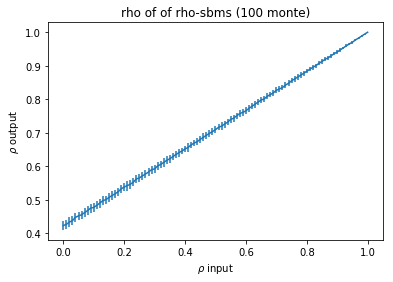

In [13]:
y = []
yerr = []
for rho in tqdm(np.linspace(0,1,101)):
    diffs = []
    for _ in range(0,100):
        A,B = rho_sbm(rho,k,L,n)
        A = A.ravel()
        B = B.ravel()
        x = np.vstack((A.ravel(),B.ravel()))
        diffs.append(np.corrcoef(x)[0,1])
        print(np.corrcoef(x))
    y.append(np.mean(diffs))
    yerr.append(np.std(diffs))
plt.errorbar(np.linspace(0,1,101),y,yerr=yerr)
plt.title('rho of of rho-sbms (100 monte)')
plt.xlabel(r"$\rho$ input")
plt.ylabel(r'$\rho$ output')
plt.show()

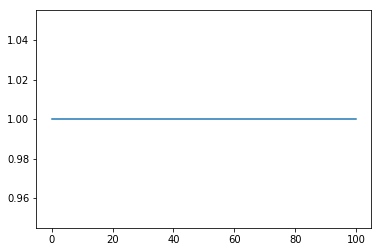

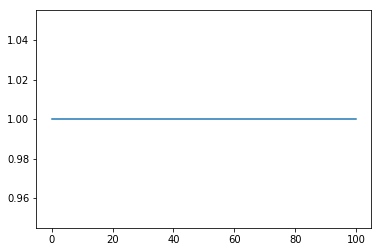

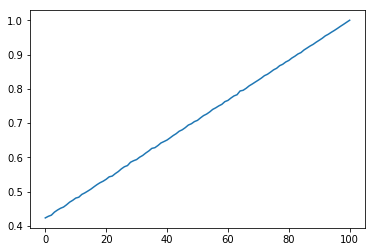

In [12]:
plt.plot(yul)
plt.show()
plt.plot(ylr)
plt.show()
plt.plot(y)
plt.show()

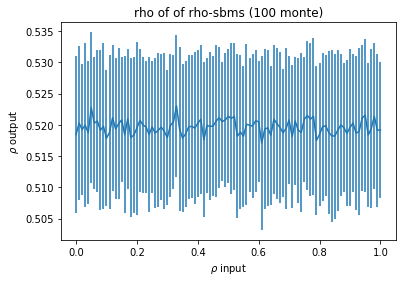

In [23]:
n = 100
k = 2
L = np.array([
    [0.9, 0.1],
    [0.1, 0.7]
])
y = []
yerr = []
for rho in tqdm(np.linspace(0,1,101)):
    diffs = []
    for _ in range(0,100):
        A,B = rho_sbm(rho,k,L,n)
        B,c = rho_sbm(rho,k,L,n)
        A = A.ravel()
        B = B.ravel()
        x = np.vstack((A.ravel(),B.ravel()))
        diffs.append(np.corrcoef(x)[0,1])
    y.append(np.mean(diffs))
    yerr.append(np.std(diffs))
plt.errorbar(np.linspace(0,1,101),y,yerr=yerr)
plt.title('rho of of rho-sbms (100 monte)')
plt.xlabel(r"$\rho$ input")
plt.ylabel(r'$\rho$ output')
plt.show()